In [17]:
pip install finterstellar

In [18]:
import finterstellar as fs
import pandas as pd
import numpy as np

In [19]:
df = fs.get_price('AAPL', start_date='2022-01-01', end_date='2022-12-31')
df

,AAPL
2022-01-03,180.19
2022-01-04,177.90
2022-01-05,173.17
2022-01-06,170.28
2022-01-07,170.45
...,...
2022-12-23,131.30
2022-12-27,129.48
2022-12-28,125.50
2022-12-29,129.06


<Axes: >

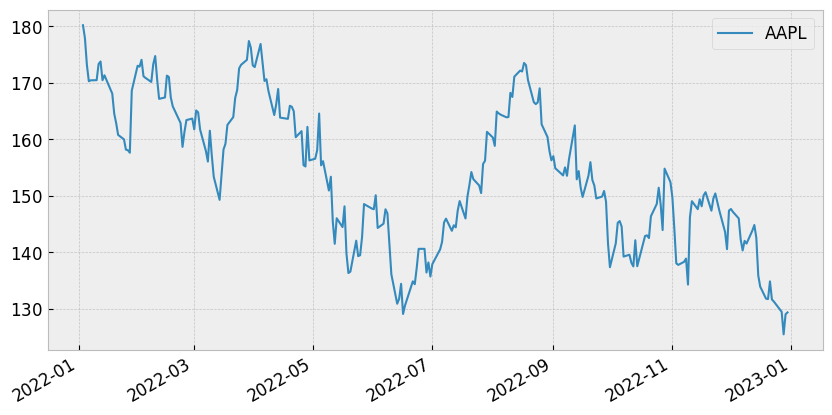

In [20]:
df.plot()

<Axes: >

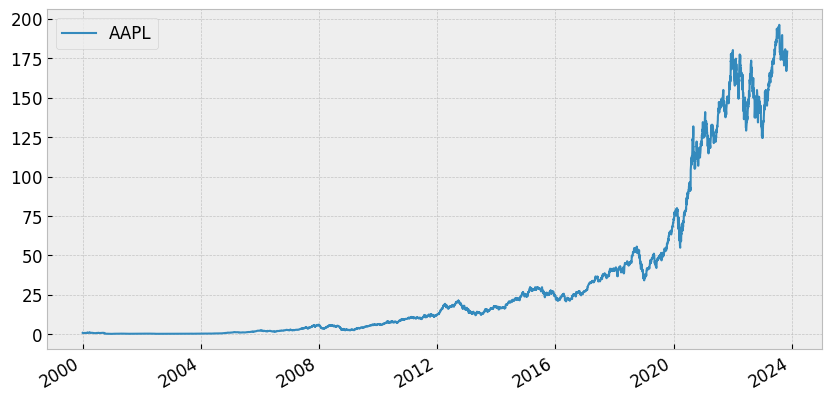

In [21]:
df = fs.get_price('AAPL', start_date='2000-01-01')
df.plot()

<Axes: >

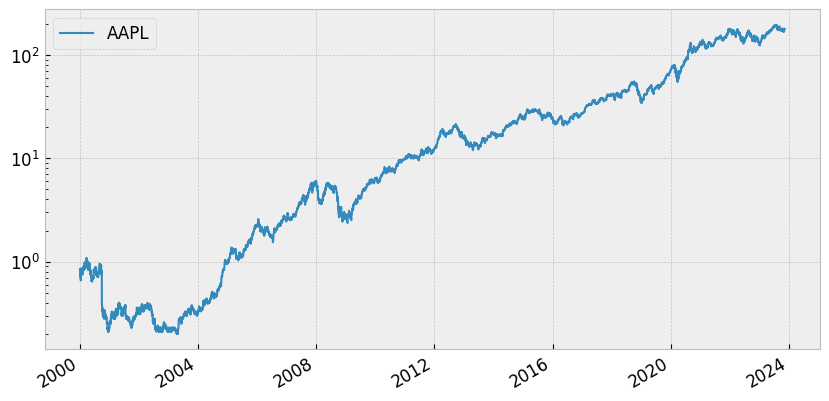

In [22]:
df.plot(logy=True)

## matplotlib

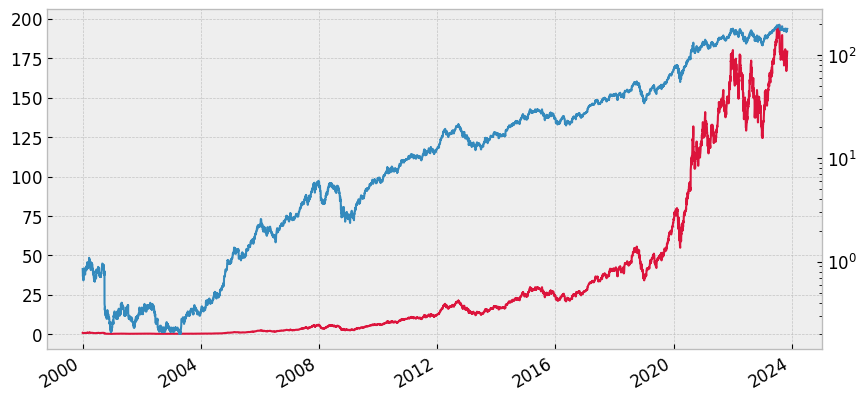

In [23]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
ax1 = df['AAPL'].plot(color='crimson')
ax2 = ax1.twinx()
ax2 = df['AAPL'].plot(logy=True, secondary_y=True)
plt.show()

## plotly

In [24]:
import plotly.express as px

In [25]:
fig = px.area(df, x=df.index, y='AAPL')
fig.show()

In [27]:
fig = px.area(df, x=df.index, y='AAPL', log_y=True)
fig.show()

In [28]:
fig = px.area(df, x=df.index, y='AAPL')
fig.update_layout(
    template='plotly_dark',
    margin=dict(l=10, r=10, t=10, b=10),
    legend=dict(yanchor='top', y=0.99, xanchor='left', x=0.01)
)

In [29]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=df.index, y=df['AAPL'], name='Price(로그)'),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=df.index, y=df['AAPL'], name='Price'),
    secondary_y=True,
)

# Set y-axes titles
fig.update_yaxes(title_text='Log', secondary_y=False, type='log')
fig.update_yaxes(secondary_y=True)

fig.update_layout(
    template='plotly_dark',
    margin=dict(l=10, r=10, t=10, b=10),
    legend=dict(yanchor='top', y=0.99, xanchor='left', x=0.01),
    yaxis2=dict(title='Price', anchor='x', overlaying='y', side='right', tickmode='sync',),
)
fig.show()

In [30]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=df.index, y=df['AAPL'], name='Log'),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=df.index, y=df['AAPL'], name='Price'),
    secondary_y=True,
)

# Set y-axes titles
fig.update_yaxes(title_text='Log', secondary_y=False, type='log')
fig.update_yaxes(secondary_y=True)
fig.update_yaxes(range=[np.log10(np.min(df['AAPL'])), np.log10(np.max(df['AAPL']))])
fig.update_yaxes(range=[np.min(df['AAPL']), np.max(df['AAPL'])], secondary_y=True)

fig.update_layout(
    template='plotly_dark',
    margin=dict(l=10, r=10, t=10, b=10),
    legend=dict(yanchor='top', y=0.99, xanchor='left', x=0.01),
)
fig.show()

#Candlestick chart

In [31]:
df2 = fs.get_ohlc('MSFT', start_date='2023-01-01')
df2

,Open,High,Low,Close,Volume,Adj Close
2023-01-03,243.08,245.75,237.40,239.58,25740000,237.96
2023-01-04,232.28,232.87,225.96,229.10,50623400,227.55
2023-01-05,227.20,227.55,221.76,222.31,39585600,220.80
2023-01-06,223.00,225.76,219.35,224.93,43613600,223.41
2023-01-09,226.45,231.24,226.41,227.12,27369800,225.58
...,...,...,...,...,...,...
2023-10-31,338.85,339.00,334.69,338.11,20265300,338.11
2023-11-01,339.79,347.42,339.65,346.07,28158800,346.07
2023-11-02,347.24,348.83,344.77,348.32,24348100,348.32
2023-11-03,349.63,354.39,347.33,352.80,23624000,352.80


In [32]:
fig = go.Figure(data=[go.Candlestick(x=df2.index,
                open=df2['Open'], high=df2['High'], low=df2['Low'], close=df2['Close'])])

fig.update_layout(
    template='plotly_dark',
    margin=dict(l=10, r=10, t=10, b=10),
    legend=dict(yanchor='top', y=0.99, xanchor='left', x=0.01)
)
fig.show()

중간중간 이빨빠진건 무엇?

plotly 에서 주말을 스킵하는 방법을 검색해보자

In [ ]:
# 공휴일 제외
fig = go.Figure(data=[go.Candlestick(x=df2.index,
                open=df2['Open'], high=df2['High'], low=df2['Low'], close=df2['Close'])])

fig.update_layout(
    template='plotly_dark',
    margin=dict(l=10, r=10, t=10, b=10),
    legend=dict(yanchor='top', y=0.99, xanchor='left', x=0.01)
)
fig.update_xaxes(
    rangebreaks=[
        dict(bounds=['sat', 'mon']), # weekend
        dict(values=['2023-07-04'])  # independence day
    ]
)
fig.show()